In [1]:
using GaussianRandomFields, PyPlot
using Random, Printf
using ArchGDAL; const AG = ArchGDAL
# using LibPQ  # 用于连接数据库PostGIS
using DataFrames
using Query
using CSV
using Statistics
using NetCDF

┌ Info: Precompiling GaussianRandomFields [e4b2fa32-6e09-5554-b718-106ed5adafe9]
└ @ Base loading.jl:1242
┌ Warning: Module Conda with build ID 262877176690550 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1000
┌ Warning: Module Conda with build ID 262877176690550 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1000
┌ Warning: Module Conda with build ID 262877176690550 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1000
┌ Warning: Module Conda with build ID 262877176690550 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is

LoadError: LoadError: LoadError: LoadError: PyCall not properly installed. Please run Pkg.build("PyCall")
in expression starting at /opt/julia/packages/PyCall/zqDXB/src/startup.jl:41
in expression starting at /opt/julia/packages/PyCall/zqDXB/src/PyCall.jl:34
in expression starting at /opt/julia/packages/PyPlot/XHEG0/src/PyPlot.jl:4

PyObject <matplotlib.colorbar.Colorbar object at 0x7fc46e493850>

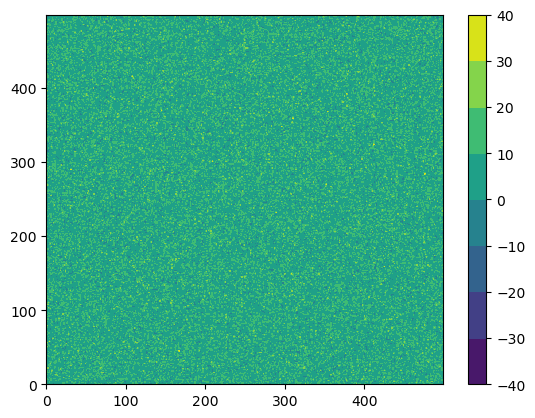

In [3]:
kernel = Exponential(0.2,σ=8,p=2 )
cov = CovarianceFunction(2, kernel)
pts_x = range(0, stop=0.499,length=500)
pts_y = range(0, stop=0.499, length=500)
grf = GaussianRandomField(cov, CirculantEmbedding(), pts_x, pts_y)

In [23]:
function rf_gen(group_num, file_name)
    data = zeros(500, 500, group_num)
    for i = 1:group_num
        data[:,:,i]=sample(grf)
    end
    var_name  = "shadow_loss"
    nccreate(file_name, var_name, "x", collect(0.5:500), "y", collect(-499.5:0), "group", collect(0:(group_num-1)) )
    ncwrite(data, file_name, var_name)
end

rf_gen (generic function with 1 method)

In [26]:
rf_gen(20, "random_fields_20.nc" ) # 产生20组 500×500 的阴影衰落数据到 文件 random_fields_20.nc